# Data Description

Baseball case study

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, 
    Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work
    
AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
        
2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
            
3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    
H – Hit: reaching base because of a batted, fair ball without error by the defense
        
HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

etc....

The output is a continuous distribution, so we can say it is a regression problem.
            
            

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.shape

(30, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


The data set non-null values, and all values are int or float, so it is good to go ahaed.

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

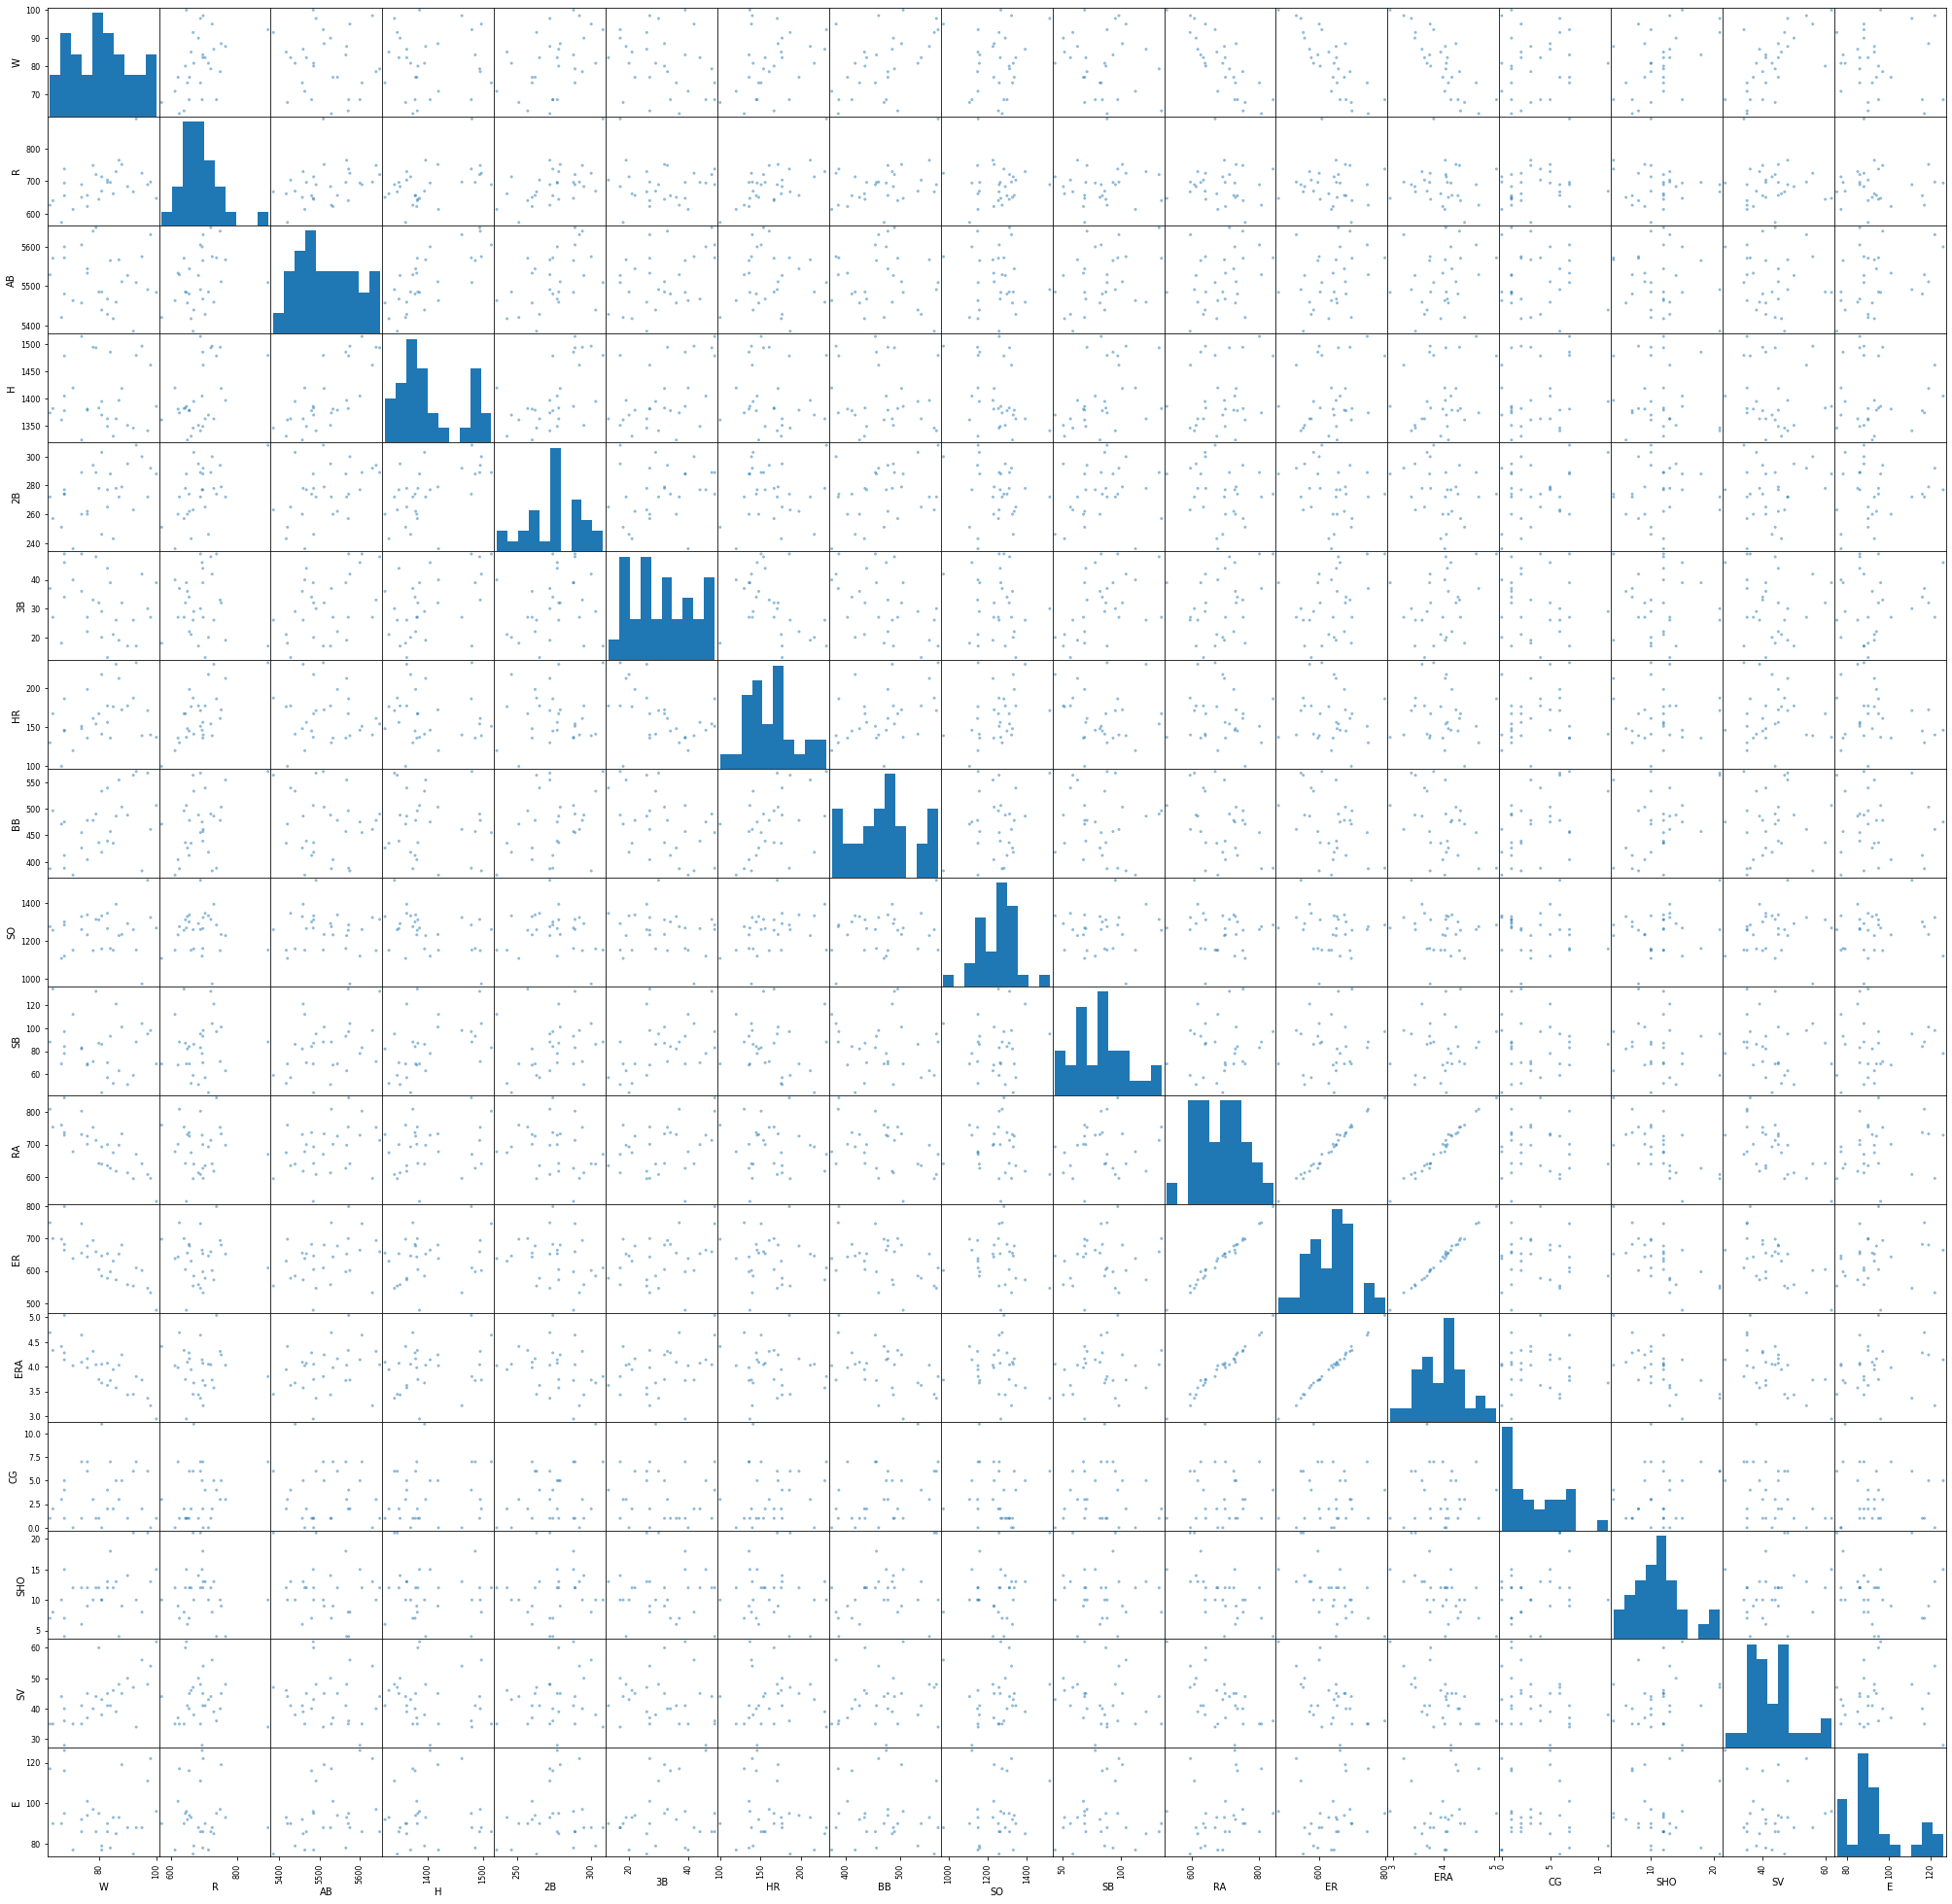

In [8]:
scatter_matrix(df, figsize=(35,35))
plt.show()

In [9]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

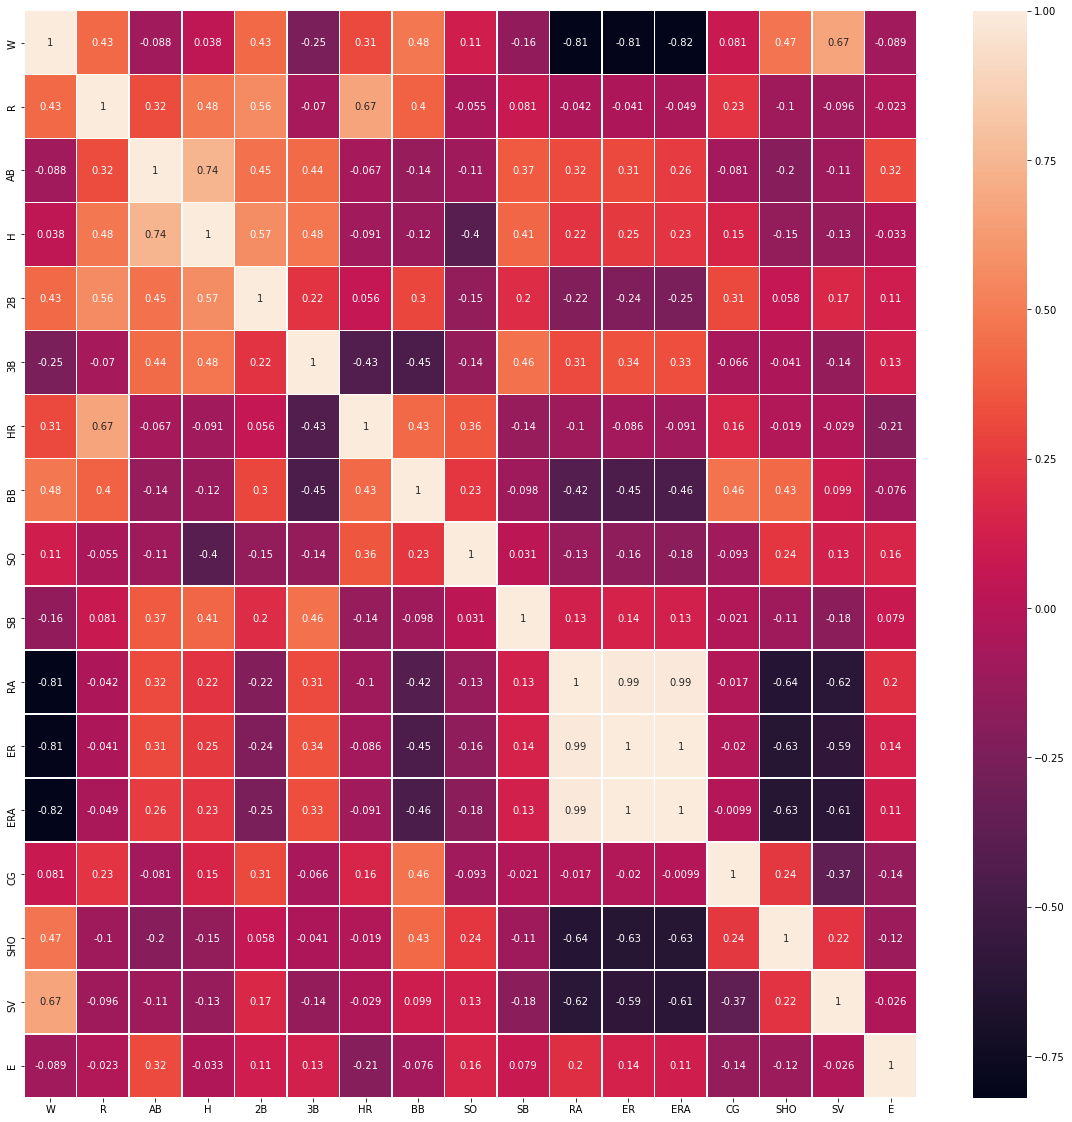

In [10]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(),annot=True, linewidth=0.5,)

RA and ER, 
ERA and RA, 
ERA and ER are highly correlated and 

only one variable can be cosidered from RA, ER and ERA

Since ER and ERA are 100% corelated, So keeping ERA(ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched) and dropping other two variables

HR and R are also correlated, now dropping R

Also ER, RA and ERA are corrrelated to W(output)

In [11]:
df_1=df.drop(columns='ER')
df_2=df_1.drop(columns='R')
df1=df_2.drop(columns='RA')


In [12]:
df1

,W,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
5,93,5509,1480,308,17,232,570,1151,88,3.80,7,10,34,88
6,87,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,81,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,80,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,78,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97


<AxesSubplot:>

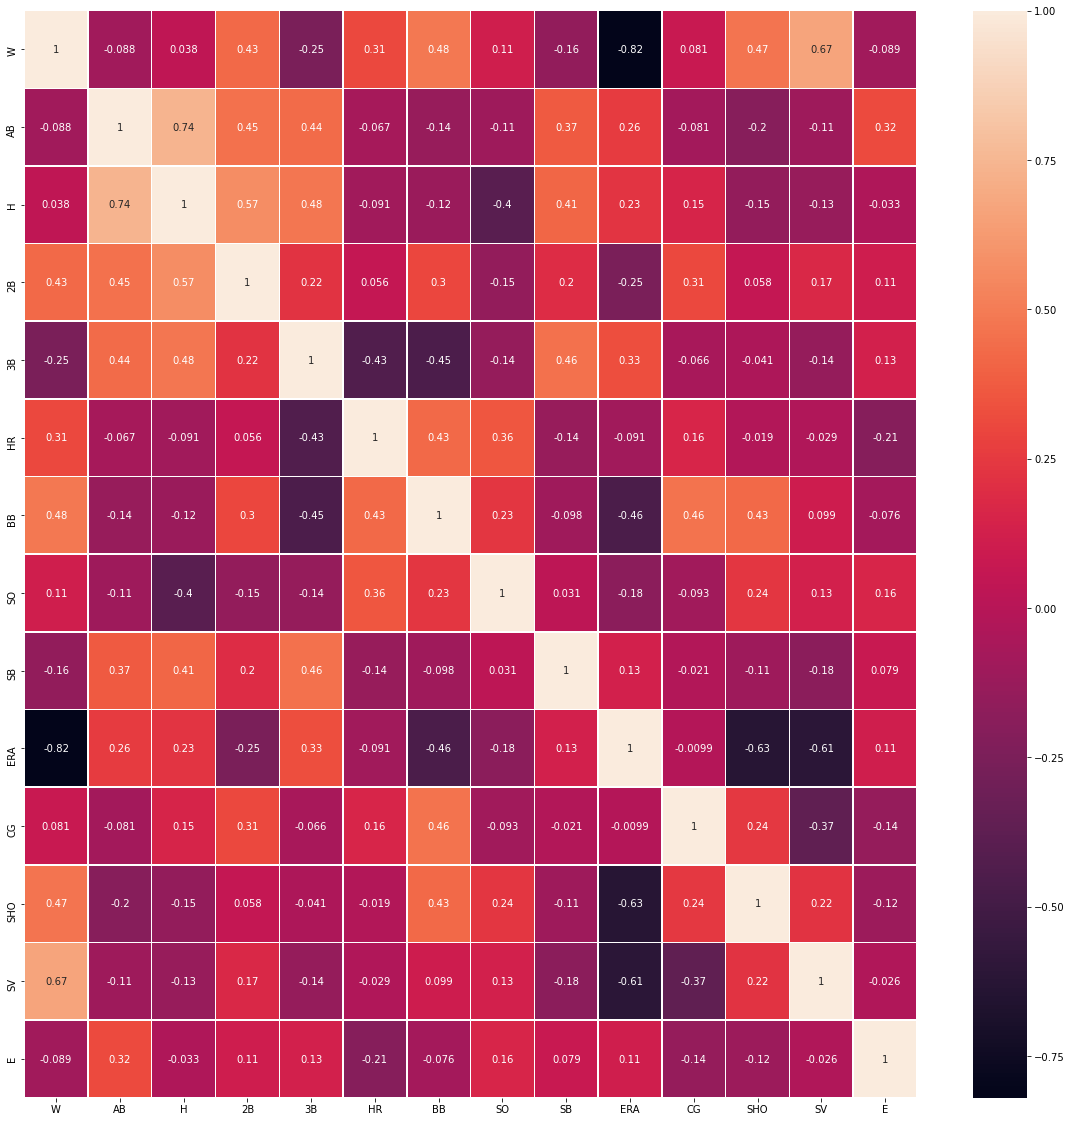

In [13]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df1.corr(),annot=True, linewidth=0.5,)

In [14]:
df1.skew()

W      0.047089
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [15]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

<AxesSubplot:xlabel='AB', ylabel='Density'>

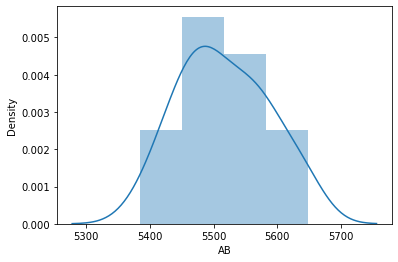

In [16]:
sns.distplot(df1["AB"])

<AxesSubplot:xlabel='H', ylabel='Density'>

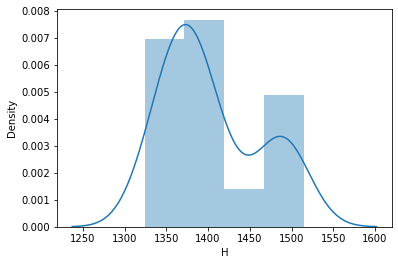

In [17]:
sns.distplot(df1["H"])

<AxesSubplot:xlabel='2B', ylabel='Density'>

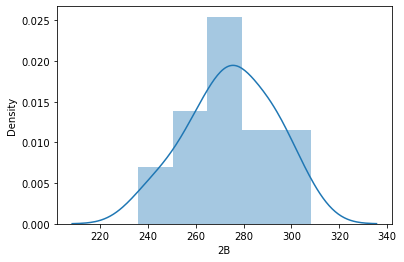

In [18]:
sns.distplot(df1["2B"])

<AxesSubplot:xlabel='3B', ylabel='Density'>

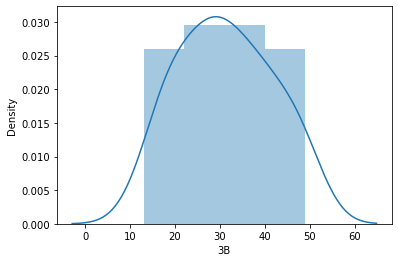

In [19]:
sns.distplot(df1["3B"])

<AxesSubplot:xlabel='HR', ylabel='Density'>

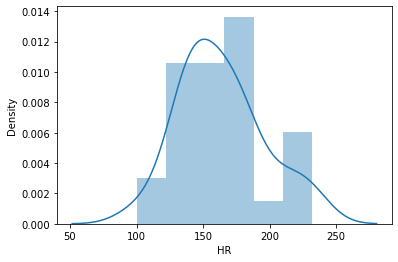

In [20]:
sns.distplot(df1["HR"])

<AxesSubplot:xlabel='BB', ylabel='Density'>

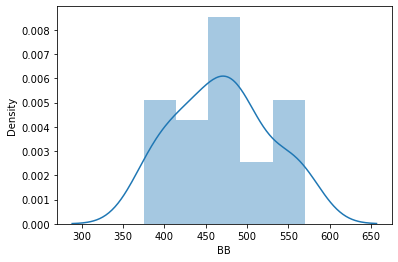

In [21]:
sns.distplot(df1["BB"])

<AxesSubplot:xlabel='SO', ylabel='Density'>

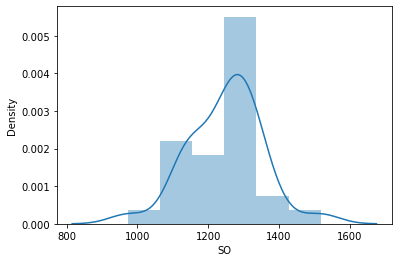

In [22]:
sns.distplot(df1["SO"])

<AxesSubplot:xlabel='SB', ylabel='Density'>

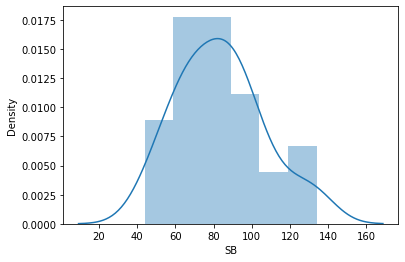

In [23]:
sns.distplot(df1["SB"])

<AxesSubplot:xlabel='ERA', ylabel='Density'>

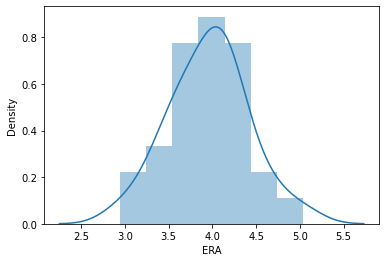

In [24]:
sns.distplot(df1["ERA"])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

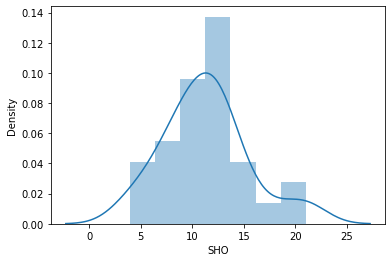

In [25]:
sns.distplot(df1["SHO"])

<AxesSubplot:xlabel='SV', ylabel='Density'>

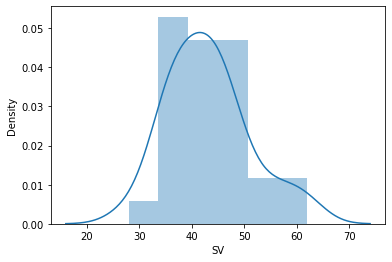

In [26]:
sns.distplot(df1["SV"])

<AxesSubplot:xlabel='E', ylabel='Density'>

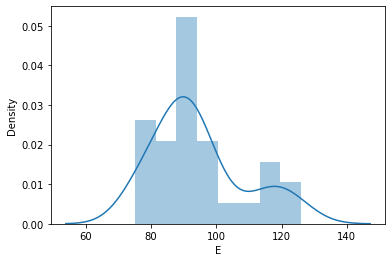

In [27]:
sns.distplot(df1["E"])

the Data seems to be normalized.

# Data Scaling

In [28]:
x=df1.drop(columns='W')
y=df1['W']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.84773126,  1.66368512,  1.42017307,  1.04119304, -0.7872986 ,
        -1.53490242, -2.69762957,  0.91388329, -0.50695519, -0.5398062 ,
        -0.81462859,  1.67160651, -0.46146963],
       [-0.71109353, -0.97068076,  0.12740339,  1.23580856, -0.24396668,
        -0.5365919 ,  0.15487844, -0.60182558,  0.25459752, -0.5398062 ,
         0.1728    ,  0.24987932, -0.60719689],
       [-1.1152333 , -0.15189137,  1.58879521, -0.22380785, -0.7233772 ,
         1.13914361, -0.89398189,  0.11144918, -0.64134684,  2.77264091,
        -0.32091429, -0.65485616, -1.11724227],
       [ 0.24152162, -0.40108814, -0.82812203, -0.41842337, -0.8831807 ,
        -1.16053598, -0.16860185, -0.69098493,  0.05301004,  1.3004422 ,
        -0.56777144, -0.78410408,  0.48575751],
       [ 1.28073815,  1.98408098,  0.80189192,  1.72234737, -0.40377019,
        -0.25136033,  0.10586628, -0.02228984,  1.53131824,  1.3004422 ,
         0.1728    , -1.04259994, -0.60719689],
       [-0.10488389,  1.361089

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)
           for i in range(x_scaled.shape[1])]
vif["feature"]=x.columns
vif

,vif,feature
0,3.581051,AB
1,5.045576,H
2,3.142250,2B
3,2.850183,3B
4,1.901062,HR
5,2.767793,BB
6,1.963486,SO
7,1.694043,SB
8,4.511081,ERA
9,2.260786,CG


VIF for H is higher than 5, but difference is .045576, ignoring it. 

# Test-Train split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=355)

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [36]:
regression.score(x_train,y_train)

0.9094319483030704

In [37]:
regression.score(x_test,y_test)

0.018820502246050697

In [38]:
y_pred=regression.predict(x_test)

In [39]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6.137874259187383
MSE: 65.187112882028
RMSE: 8.073853657456766


It is a underfitted model. Not considering it at all.

# KNN model

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
knn= KNeighborsRegressor()

In [42]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [43]:
y_pred= knn.predict(x_test)
y_pred

array([81.4, 82.8, 74.6, 76.2, 81.4, 76.2, 75. , 79.6])

In [44]:
knn.score(x_train,y_train)

0.205116049020865

In [45]:
knn.score(x_test, y_test)

-0.668033866415805

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 9.200000000000001
MSE: 110.82000000000005
RMSE: 10.527107864936127


Since the models tried are not performing well.

so considering all the parameters and ignoring multicollinearity.

In [47]:
from sklearn.metrics import accuracy_score
x1=df.drop(columns='W')
y1=df['W']

In [48]:
scaler=StandardScaler()
x1_scaled= scaler.fit_transform(x)
x1_scaled

array([[ 0.84773126,  1.66368512,  1.42017307,  1.04119304, -0.7872986 ,
        -1.53490242, -2.69762957,  0.91388329, -0.50695519, -0.5398062 ,
        -0.81462859,  1.67160651, -0.46146963],
       [-0.71109353, -0.97068076,  0.12740339,  1.23580856, -0.24396668,
        -0.5365919 ,  0.15487844, -0.60182558,  0.25459752, -0.5398062 ,
         0.1728    ,  0.24987932, -0.60719689],
       [-1.1152333 , -0.15189137,  1.58879521, -0.22380785, -0.7233772 ,
         1.13914361, -0.89398189,  0.11144918, -0.64134684,  2.77264091,
        -0.32091429, -0.65485616, -1.11724227],
       [ 0.24152162, -0.40108814, -0.82812203, -0.41842337, -0.8831807 ,
        -1.16053598, -0.16860185, -0.69098493,  0.05301004,  1.3004422 ,
        -0.56777144, -0.78410408,  0.48575751],
       [ 1.28073815,  1.98408098,  0.80189192,  1.72234737, -0.40377019,
        -0.25136033,  0.10586628, -0.02228984,  1.53131824,  1.3004422 ,
         0.1728    , -1.04259994, -0.60719689],
       [-0.10488389,  1.361089

In [49]:
x1_train, x1_test, y1_train, y1_test= train_test_split(x1_scaled,y,test_size=0.25, random_state=323)

In [50]:
regression1=LinearRegression()
regression1.fit(x1_train, y1_train)

LinearRegression()

In [51]:
regression1.score(x1_train,y1_train)

0.8840456400549596

In [52]:
regression1.score(x1_test,y1_test)

0.8146025255996667

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 9.200000000000001
MSE: 110.82000000000005
RMSE: 10.527107864936127


## Considering the regression1 as final model, as it is giving 81% score

# Saving Final model

In [ ]:
import pickle

In [ ]:
filename='Baseball.pickle'
pickle.dump(regression1,open(filename,'wb'))